# Tratamiento de Datos con Pandas y Numpy

## Importación de librerías y generación de datos simulados

Creamos un dataset simulando un registro de conexiones de red y lo almacenamos en un DataFrame. Exploramos las primeras filas, la información general del DataFrame y las estadísticas descriptivas.

En este bloque primero importamos las librerías/dependencias (pandas, numpy, matplotlib, seaborn) que utilizaremos para el ejercicio.

- pandas.- Se utiliza para el manejo y análisis de datos estructurados.
- numpy.- se usa para operaciones numéricas eficientes.
- matplotlib.pyplot y seaborn.- se utilizan para la creación de gráficos y visualizaciones.

   * np.random.seed(42): Establece una semilla para el generador de números aleatorios de numpy para asegurar que los resultados sean reproducibles.
   * eventos = ['...: Se define una lista de tipos de eventos de seguridad que serán utilizados para simular los logs.
   * fechas = pd.date_range(start='2023-01-01', periods=7): Se genera un rango de fechas (timestamps) que cubren una semana (7 días), con tres eventos por hora aproximadamente.
   * timestamps = timestamps[:500]: Se define la lista de timestamps para que contenga exactamente 500 registros.
   * def random_ip(): Función que genera direcciones IP de manera aleatoria.
   * usuarios = ['admin', 'user1', 'user2', 'user3', 'system', 'guest', None]: Se define una lista de usuarios que se utilizarán en los logs simulados.
   * data = {...: Se utilizan las listas y funciones definidas para generar un diccionario de datos simulados con 500 registros.
   * logs_df = pd.DataFrame(data): Crea un DataFrame de pandas a partir del diccionario de datos simulados (data).
   * logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])  y  logs_df = logs_df.sort_values('timestamp'): Se convierte la columna timestamp a un formato de fecha y hora y ordena el DataFrame por esta columna.
   * plt.figure(figsize=(15, 10)): Se configura el tamaño de la figura para las visualizaciones que se crearán a continuación utilizando matplotlib.

### Errores encontrados

Error 1: "ModuleNotFoundError: No module named 'seaborn'", esto lo resolvimos con el comando pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Usaremos los datos generados en el ejemplo anterior
# Para simplificar, recreamos un conjunto similar pero más pequeño
# Generar 500 registros de logs simulados
np.random.seed(42)
# Lista de eventos de seguridad
eventos = ['login_success', 'login_failure', 'file_access', 'admin_login', 
           'password_change', 'firewall_block', 'suspicious_activity', 
           'malware_detected', 'port_scan']
# Generar timestamps para una semana
fechas = pd.date_range(start='2023-01-01', periods=7)
timestamps = []
for fecha in fechas:
    for hora in range(24):
        for _ in range(3):  # 3 eventos por hora aprox
            timestamps.append(fecha + pd.Timedelta(hours=hora) + 
                             pd.Timedelta(minutes=np.random.randint(60)))
# Ajustar al número de registros deseados
timestamps = timestamps[:500]
# Generar IPs aleatorias
def random_ip():
    return f"{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}"
# Usuarios del sistema
usuarios = ['admin', 'user1', 'user2', 'user3', 'system', 'guest', None]
# Generar datos simulados
data = {
    'timestamp': timestamps,
    'ip_origen': [random_ip() for _ in range(500)],
    'evento': np.random.choice(eventos, 500, p=[0.3, 0.2, 0.2, 0.05, 0.05, 0.08, 0.07, 0.03, 0.02]),
    'usuario': np.random.choice(usuarios, 500, p=[0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]),
    'severidad': np.random.choice(['low', 'medium', 'high', 'critical'], 500, p=[0.5, 0.3, 0.15, 0.05]),
    'exitoso': np.random.choice([True, False], 500, p=[0.8, 0.2]),
}
# Crear DataFrame
logs_df = pd.DataFrame(data)
# Configurar timestamp como índice
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df = logs_df.sort_values('timestamp')
# Ahora creamos las visualizaciones
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

## 1. Visualización de datos - Distribución de eventos por tipo
   * plt.subplot(2, 2, 1): Aquí se crea una subgráfica en una figura que tiene una disposición de 2 filas y 2 columnas. La subgráfica se coloca en la primera posición. Esto es útil para crear múltiples gráficos en una sola figura.
   * eventos_count = logs_df['evento'].value_counts(): Se cuenta cuántas veces aparece cada tipo de evento en la columna 'evento' del DataFrame logs_df y se almacena el resultado en eventos_count.
   * sns.barplot(x=eventos_count.index, y=eventos_count.values): Se utiliza seaborn para crear un gráfico de barras. En el eje x se colocan los tipos de eventos (eventos_count.index), y en el eje y se colocan las frecuencias de cada evento (eventos_count.values).
   * plt.xticks(rotation=45, ha='right'): Esta línea rota las etiquetas del eje x 45 grados y las alinea a la derecha.
   * plt.tight_layout(): Ajusta automáticamente los parámetros de la figura para que los subgráficos y las etiquetas no se solapen y todo el contenido se vea correctamente en la figura.

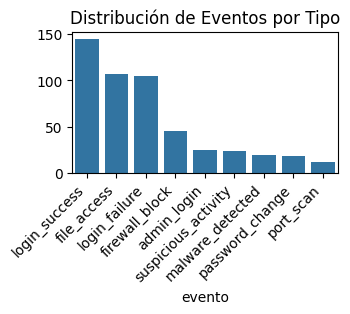

In [3]:
# 1. Distribución de eventos por tipo
plt.subplot(2, 2, 1)
eventos_count = logs_df['evento'].value_counts()
sns.barplot(x=eventos_count.index, y=eventos_count.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Eventos por Tipo')
plt.tight_layout()

## 2. Distribución de eventos por severidad
- plt.subplot(2, 2, 2): Aquí se crea una subgráfica en una figura que tiene una disposición de 2 filas y 2 columnas. La subgráfica se coloca en la primera posición. Esto es útil para crear múltiples gráficos en una sola figura.
- severidad_count = logs_df['severidad'].value_counts(): Se cuenta cuántas veces aparece cada nivel de severidad en la columna 'severidad' del DataFrame logs_df y se almacena el resultado en severidad_count.
- colors = {'low': 'green', 'medium': 'blue', 'high': 'orange', 'critical': 'red'}: Asigna un color específico a cada nivel de severidad. Esto se usará para colorear las porciones del gráfico de pastel.
- plt.pie(severidad_count, labels=severidad_count.index, autopct='%1.1f%%', colors=[colors[sev] for sev in severidad_count.index]): Se utiliza matplotlib para crear un gráfico de pastel que muestra la distribución de los eventos por severidad:

   * severidad_count: proporciona los tamaños de las porciones del pastel.
   * labels=severidad_count.index: añade etiquetas a cada porción usando los niveles de severidad.
   * autopct='%1.1f%%': añade porcentajes a cada porción del pastel, con un decimal.
   * colors=[colors[sev] for sev in severidad_count.index]: asigna colores a cada porción basado en el diccionario colors.

En resumen, este código crea una subgráfica que muestra un gráfico de pastel con la distribución de eventos por severidad, asignando colores específicos a cada nivel de severidad y añadiendo un título descriptivo.

Text(0.5, 1.0, 'Distribución de Eventos por Severidad')

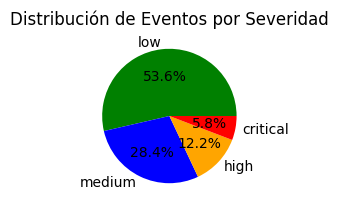

In [4]:
# 2. Distribución de eventos por severidad
plt.subplot(2, 2, 2)
severidad_count = logs_df['severidad'].value_counts()
colors = {'low': 'green', 'medium': 'blue', 'high': 'orange', 'critical': 'red'}
plt.pie(severidad_count, labels=severidad_count.index, autopct='%1.1f%%',
        colors=[colors[sev] for sev in severidad_count.index])
plt.title('Distribución de Eventos por Severidad')

## 3. Actividad por hora del día
Este bloque de código genera un gráfico que muestra la actividad de eventos por hora del día a partir del DataFrame logs_df.

- plt.subplot(2, 2, 3): Se crea una subgráfica en la tercera posición de la figura de 2x2.
- logs_df['hour'] = logs_df['timestamp'].dt.hour: Se extrae la hora de la columna timestamp y se crea una nueva columna hour.
- hourly_count = logs_df.groupby('hour').size(): Se cuenta el número de eventos por hora.
- sns.lineplot(x=hourly_count.index, y=hourly_count.values): Se crea un gráfico de líneas que muestra la actividad por hora del día, con etiquetas descriptivas y título.

Text(0, 0.5, 'Número de Eventos')

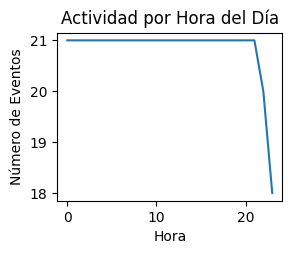

In [6]:
# 3. Actividad por hora del día
plt.subplot(2, 2, 3)
logs_df['hour'] = logs_df['timestamp'].dt.hour
hourly_count = logs_df.groupby('hour').size()
sns.lineplot(x=hourly_count.index, y=hourly_count.values)
plt.title('Actividad por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')

## 4. Eventos por día y por severidad

- plt.subplot(2, 2, 3): Se crea una subgráfica en la tercera posición de la figura de 2x2.
- logs_df['date'] = logs_df['timestamp'].dt.date: Extrae la fecha sin la hora de la columna timestamp y la almacena en una nueva columna llamada date.
- pivot_table = pd.crosstab(logs_df['date'], logs_df['severidad']): Se crea una tabla cruzada que muestra la cantidad de eventos por fecha y nivel de severidad.
- pivot_table.plot(kind='bar', stacked=True, colormap='viridis'): Crea un gráfico de barras apiladas utilizando la tabla cruzada. La opción stacked=True indica que las barras serán apiladas, y colormap='viridis' aplica un esquema de color.
- plt.title('Eventos por Día y Severidad'): Se agrega un título a la subgráfica para indicar qué información se está mostrando.
- plt.xlabel('Fecha'): Añade la etiqueta "Fecha" al eje x indicando que representa las fechas.
- plt.ylabel('Número de Eventos'): Añade la etiqueta al eje y indicando que representa el número de eventos.
- plt.xticks(rotation=45): Rota las etiquetas del eje x 45 grados.
- plt.tight_layout(): Ajusta los parámetros de la figura para que los subgráficos y las etiquetas no se solapen y el contenido se vea correctamente en la figura.
- plt.savefig('security_dashboard.png'): Guarda la figura completa con todas las subgráficas en un archivo de imagen (PNG) llamado security_dashboard.png.

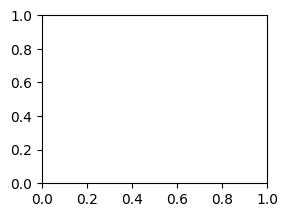

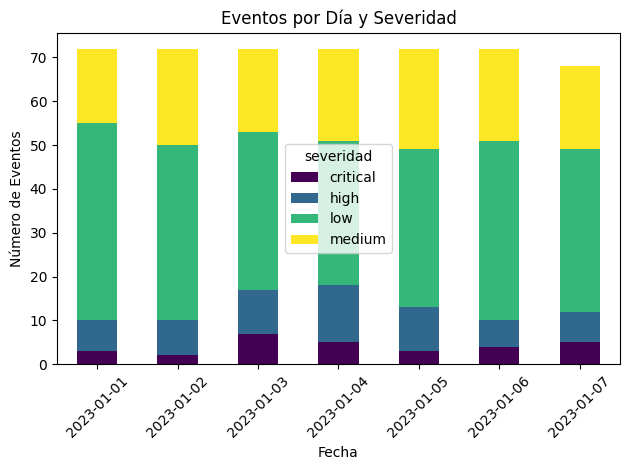

In [7]:
# 4. Eventos por día y por severidad
plt.subplot(2, 2, 4)
logs_df['date'] = logs_df['timestamp'].dt.date
pivot_table = pd.crosstab(logs_df['date'], logs_df['severidad'])
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Eventos por Día y Severidad')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('security_dashboard.png')


## 5. Eventos por severidad

Este código crea un mapa de calor que muestra la actividad por hora del día y tipo de evento, con anotaciones en las celdas, etiquetas descriptivas, un título, y ajusta el diseño antes de guardar la figura como una imagen.

- plt.figure(figsize=(12, 6)): Configura una nueva figura con un tamaño específico para el próximo gráfico que se va a crear.
- logs_df['hour'] = logs_df['timestamp'].dt.hour: Extrae la hora de la columna timestamp y la almacena en una nueva columna llamada hour.
- heatmap_data = pd.crosstab(logs_df['hour'], logs_df['evento']): Utiliza pd.crosstab para crear una tabla cruzada que muestra la cantidad de eventos por cada hora del día y cada tipo de evento.
- sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Número de Eventos'}): Con seaborn se crea un mapa de calor:
   * heatmap_data: proporciona los datos para el mapa de calor.
   * cmap='YlOrRd': Define el esquema de colores (de amarillo a rojo).
   * annot=True: Añade anotaciones con los valores de los datos dentro de cada celda del mapa de calor.
   * fmt='d': Especifica que las anotaciones deben estar en formato de número entero.
   * cbar_kws={'label': 'Número de Eventos'}: Añade una etiqueta a la barra de color para indicar qué representa.
- plt.title('Eventos por Hora y Tipo'): Agrega un título al mapa de calor para indicar qué información se está mostrando.
- plt.xlabel('Tipo de Evento'): Añade la etiqueta "Tipo de Evento" al eje x.
- plt.ylabel('Hora del Día'): Añade la etiqueta "Hora del Día" al eje y.
- plt.tight_layout(): Ajusta los parámetros de la figura para que las subgráficas y las etiquetas no se solapen y todo el contenido se vea correctamente en la figura.
- plt.savefig('activity_heatmap.png'): Guarda la figura con el mapa de calor en un archivo de imagen (PNG) llamada activity_heatmap.png.

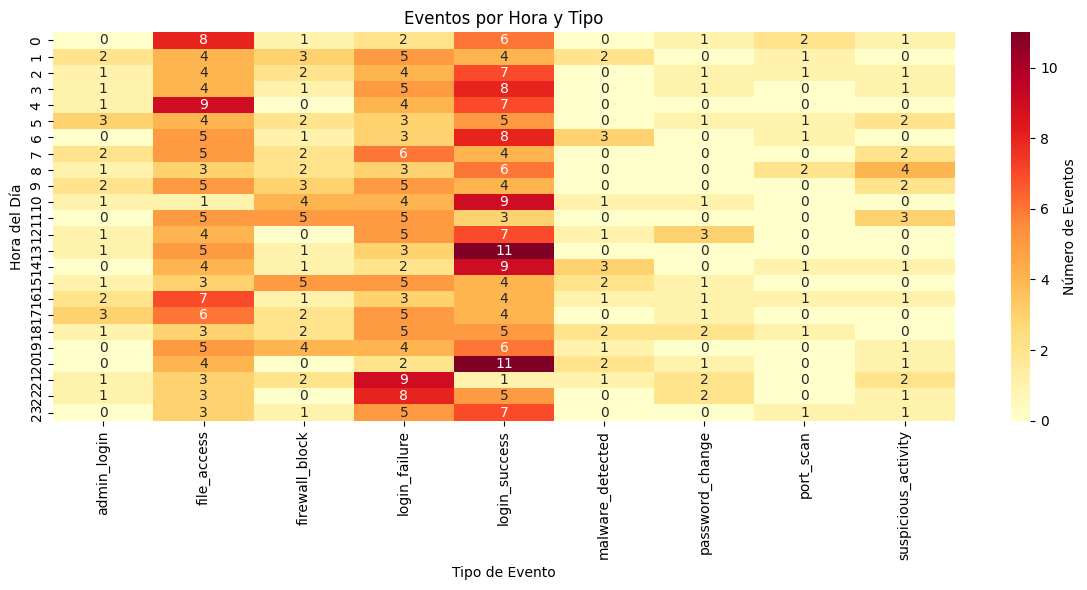

In [8]:
# Crear gráfico de actividad sospechosa
plt.figure(figsize=(12, 6))
# 5. Mapa de calor de actividad por hora y tipo de evento
logs_df['hour'] = logs_df['timestamp'].dt.hour
heatmap_data = pd.crosstab(logs_df['hour'], logs_df['evento'])
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Número de Eventos'})
plt.title('Eventos por Hora y Tipo')
plt.xlabel('Tipo de Evento')
plt.ylabel('Hora del Día')
plt.tight_layout()
plt.savefig('activity_heatmap.png')

## 6. Accesos fallidos por usuario

Se crea un gráfico de barras que muestra el número de intentos fallidos de login por usuario, rotando las etiquetas del eje x, añadiendo etiquetas descriptivas y un título, ajustando el diseño y guardando la figura como una imagen.

- plt.figure(figsize=(10, 6)): Configura una nueva figura para el gráfico con tamaño específico de 10x6 pulgadas.
- failed_logins = logs_df[(logs_df['evento'] == 'login_failure') & (logs_df['exitoso'] == False)]: Filtra el DataFrame logs_df para obtener los registros donde el evento es 'login_failure' y la conexión no fue exitosa 'exitoso == False'.
- user_failures = failed_logins['usuario'].value_counts(): Se cuenta cuántas veces cada usuario ha tenido intentos fallidos de login, y almacena los resultados en user_failures.
- sns.barplot(x=user_failures.index.fillna('anónimo'), y=user_failures.values): Con seaborn se crea un gráfico de barras que muestra el número de intentos fallidos de login por usuario:
   * x=user_failures.index.fillna('anónimo'): coloca los usuarios en el eje x, reemplazando valores NaN con la etiqueta 'anónimo'.
   * y=user_failures.values: coloca el número de intentos fallidos en el eje y.
- plt.title('Intentos de Login Fallidos por Usuario'): Agrega un título al gráfico.
- plt.xlabel('Usuario'): Añade la etiqueta "Usuario" al eje x.
- plt.ylabel('Número de Intentos Fallidos'): Añade la etiqueta "Número de Intentos Fallidos" al eje y.
- plt.xticks(rotation=45): Rota las etiquetas del eje x 45 grados.
- plt.tight_layout(): Ajusta los parámetros de la figura para que las subgráficas y las etiquetas no se solapen y todo el contenido se vea correctamente en la figura.
- plt.savefig('failed_logins_by_user.png'): Guarda la figura con el mapa de calor en un archivo de imagen (PNG) llamada failed_logins_by_user.png.

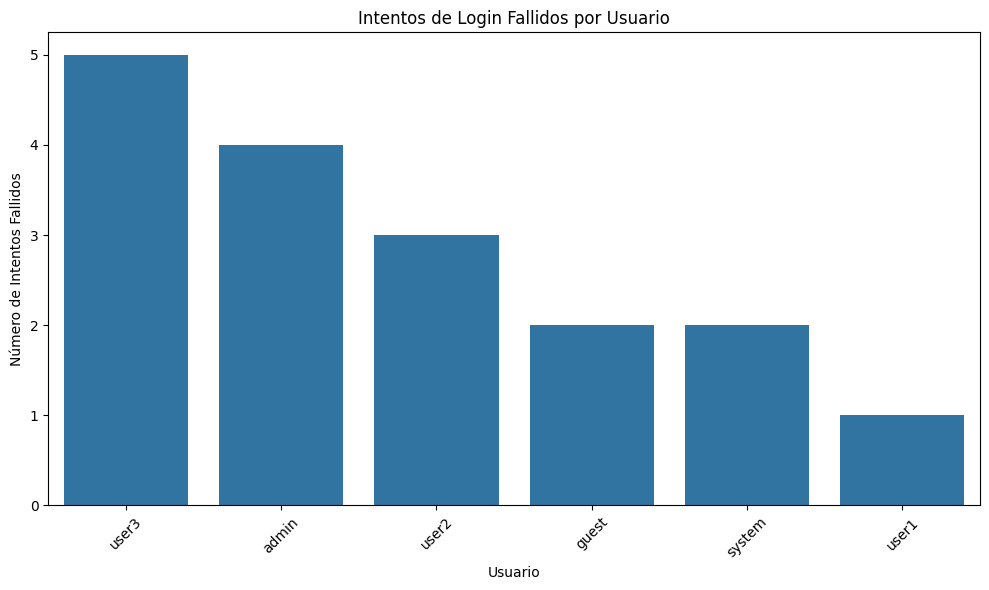

In [9]:
# 6. Análisis de accesos fallidos por usuario
plt.figure(figsize=(10, 6))
failed_logins = logs_df[(logs_df['evento'] == 'login_failure') & (logs_df['exitoso'] == False)]
user_failures = failed_logins['usuario'].value_counts()
sns.barplot(x=user_failures.index.fillna('anónimo'), y=user_failures.values)
plt.title('Intentos de Login Fallidos por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Número de Intentos Fallidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('failed_logins_by_user.png')

## 7. Detección de Anomalías Simples

Este código crea un gráfico de dispersión que muestra los eventos críticos en una línea de tiempo, eliminando las etiquetas del eje y, añadiendo etiquetas descriptivas y un título, ajustando el diseño y guardando la figura como una imagen.

- plt.figure(figsize=(12, 4)): 
- critical_events = logs_df[logs_df['severidad'] == 'critical']: Filtra el DataFrame para obtener los registros cuya severidad de evento es 'critical'.
- plt.scatter(critical_events['timestamp'], [1]*len(critical_events), c='red', s=100): Se crea un gráfico de dispersión que muestra los eventos críticos en una línea de tiempo:
   * critical_events['timestamp']: proporciona las fechas y horas de los eventos críticos en el eje x.
   * [1]*len(critical_events): crea una lista con el valor 1 repetido tantas veces como eventos críticos, para ubicarlos en una misma línea horizontal.
   * c='red': Define el color de los puntos en rojo.
   * s=100: Define el tamaño de los puntos en 100.
- plt.yticks([]): Elimina las etiquetas del eje y, ya que todos los puntos están ubicados en la misma línea horizontal.
- plt.title('Línea de Tiempo de Eventos Críticos'): Agrega un título.
- plt.xlabel('Fecha y Hora'): Añade la etiqueta "Fecha y Hora" al eje x.
- plt.tight_layout(): Ajusta los parámetros de la figura para que las subgráficas y las etiquetas no se solapen y todo el contenido se vea correctamente en la figura.
- plt.savefig('critical_events_timeline.png'): Guarda la figura con el gráfico en un archivo de imagen (PNG) llamada critical_events_timeline.png.
- print("Visualizaciones generadas correctamente. Revisa los archivos .png generados."): Imprime un mensaje en la consola indicando que las visualizaciones se generaron correctamente y que los archivos de imagen (.png) están disponibles para revisión.

In [ ]:
# 7. Línea de tiempo de eventos críticos
plt.figure(figsize=(12, 4))
critical_events = logs_df[logs_df['severidad'] == 'critical']
plt.scatter(critical_events['timestamp'], [1]*len(critical_events), c='red', s=100)
plt.yticks([])
plt.title('Línea de Tiempo de Eventos Críticos')
plt.xlabel('Fecha y Hora')
plt.tight_layout()
plt.savefig('critical_events_timeline.png')
print("Visualizaciones generadas correctamente. Revisa los archivos .png generados.")